# url: https://tkstock.site/2022/04/03/python-k-means-cluster-pca-dimention-plot-scatter/

# 【Python】K-MEANSでのクラスタリング結果を主成分分析で次元削減してグラフで可視化する

業務でクラスタリングした結果をプロットしてほしい、みたいな依頼を受けたのですが2次以上の多次元の配列データをk-meansでクラスタリングした結果ってどうやって可視化するんだっけ…？と少し悩んだのでメモしておきます。

## データの準備&前処理


sk-learnにあるワインのデータを使います。

In [1]:
from matplotlib import pyplot as plt
from sklearn import datasets, preprocessing
import numpy as np
import pandas as pd

wine_data = datasets.load_wine()
df = pd.DataFrame(wine_data.data, columns=wine_data.feature_names)

display(df)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


## K-meansでクラスタリングを行う

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

sc = StandardScaler()
clustering_sc = sc.fit_transform(df)

# クラスタリング
kmeans = KMeans(n_clusters=5, random_state=0)
clusters = kmeans.fit(clustering_sc)

df['cluster'] = clusters.labels_
display(df.groupby('cluster').count().iloc[:,1])

# 雑にクラスタリングしていますが、本来はエルボー法とかでクラスターのばらけ具合を見た方が良いです。

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


cluster
0    48
1    21
2    56
3    24
4    29
Name: malic_acid, dtype: int64

これでクラスタリングできましたが、このままだとプロットすることは難しいです。

## PCA(主成分分析)で次元を削減を行う

PCA(主成分分析)とはデータの特徴を損なうことなく、次元を削減する手法です。


参照：【Python】主成分分析(PCA)でのクラスタリングを実装する

In [3]:
# PCAでデータを2次元に削減する
from sklearn.decomposition import PCA
x = clustering_sc
pca = PCA(n_components=2)
pca.fit(x)

x_pca = pca.transform(x)
pca_df = pd.DataFrame(x_pca)

pca_df['cluster'] = df['cluster'].values

display(pca_df)

,0,1,cluster
0,3.316751,-1.443463,2
1,2.209465,0.333393,2
2,2.516740,-1.031151,2
3,3.757066,-2.756372,2
4,1.008908,-0.869831,2
...,...,...,...
173,-3.370524,-2.216289,0
174,-2.601956,-1.757229,0
175,-2.677839,-2.760899,0
176,-2.387017,-2.297347,0


## 散布図をプロットする(2次元)

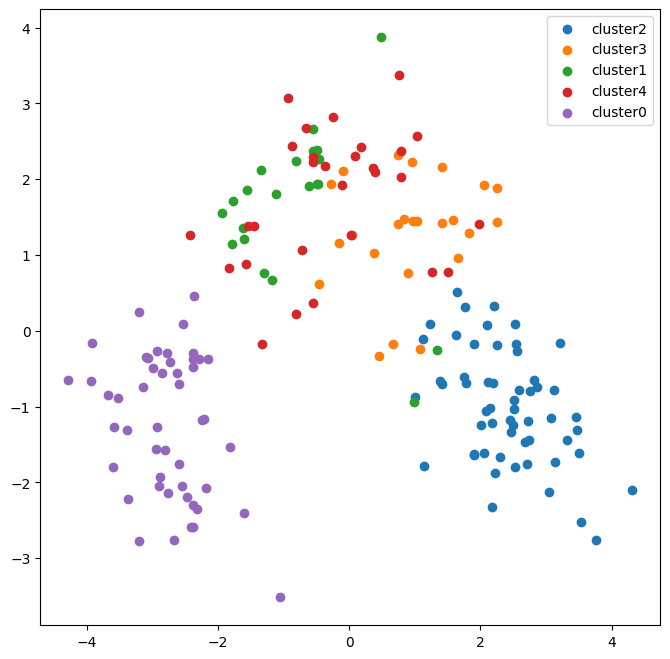

In [4]:
import matplotlib.pyplot as plt

%matplotlib inline

fig = plt.figure(figsize = (8, 8))

for i in pca_df['cluster'].unique():
    tmp = pca_df.loc[pca_df['cluster'] == i]
    plt.scatter(tmp[0], tmp[1], label=f'cluster{i}')

# 各要素にDataFrameのインデックスの数字をラベルとして付ける

plt.legend()

## 散布図をプロットする(3次元)


ちなみに2次元の散布図で見るとクラスターが固まっている場合は3次元プロットで3D立体的に見ることで散らばり具合を確認できるケースもあります。



          0         1         2  cluster
0  3.316751 -1.443463 -0.165739        2
1  2.209465  0.333393 -2.026457        2
2  2.516740 -1.031151  0.982819        2
3  3.757066 -2.756372 -0.176192        2
4  1.008908 -0.869831  2.026688        2


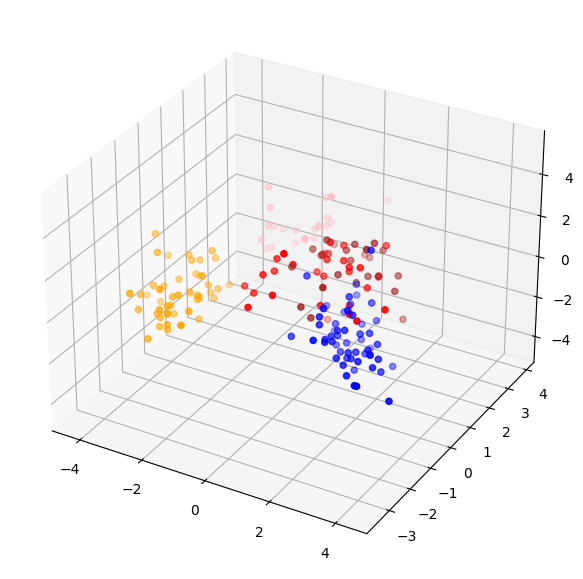

In [5]:
fig = plt.figure(figsize = (16, 16))

# PCAでデータを2次元に削減する

from sklearn.decomposition import PCA

x = clustering_sc

# 三次元なので次元圧縮後の次元数を3に指定する
pca = PCA(n_components=3)

pca.fit(x)

x_pca = pca.transform(x)

pca_df = pd.DataFrame(x_pca)

pca_df['cluster'] = df['cluster'].values

print(pca_df.head())

ax = fig.add_subplot(222, projection='3d')

# 視点角度を調整する

#ax.view_init(elev=30, azim=30)

color_list = ["orange","pink","blue","brown","red","grey","yellow","green", "darkblue", "c"]

for i in pca_df['cluster'].unique():
    tmp = pca_df.loc[pca_df['cluster'] == i]
    sc = ax.scatter(tmp[0], tmp[1], tmp[2], color=color_list[i])

三次元プロットのグラフの視点の方向はコメントアウトしている#ax.view_init(elev=30, azim=30)の部分の数値を弄ってもらえれば変更できます。

Matplotlibの3次元プロットしてグラフの視点や角度の変更について以下記事参照：
Python 3次元グラフのテーマカラー，グラフの表示角度を変更 – Qiita